Data loaded from your CSV file successfully!
Accuracy on test data by SVM Classifier: 0.75
Accuracy on test data by Naive Bayes Classifier: 0.25
Accuracy on test data by Random Forest Classifier: 0.75


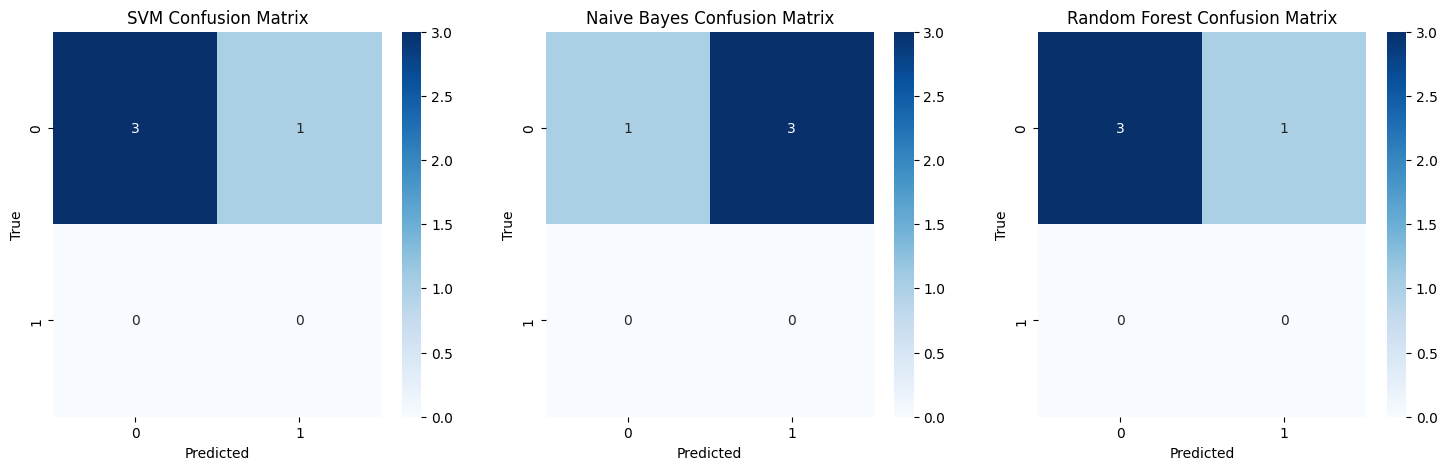

{'svm_model_prediction': 1, 'naive_bayes_prediction': 1, 'random_forest_prediction': 1, 'final_prediction': 1}


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
from collections import Counter

# Replace 'path/to/your/file.csv' with the actual path to your CSV file
csv_file_path = 'sample_flu_data.csv'

# Load the data into a DataFrame using pandas
data = pd.read_csv(csv_file_path)
print("Data loaded from your CSV file successfully!")

# Preprocess the data (replace with your specific preprocessing steps)
# For example, you can handle missing values, convert categorical variables to numerical variables, etc.

# Feature names (assuming these are the features in your CSV)
feature_names = ["fever", "cough", "sore_throat", "headache", "muscle_aches", "fatigue"]

# Split the data into features (X) and target (y)
X = data[feature_names]
y = data["flu_like_illness"]  # Assuming "flu_like_illness" is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Define the models
svm_model = SVC()
nb_model = GaussianNB()
rf_model = RandomForestClassifier(random_state=18)

# Train the models
svm_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
svm_preds = svm_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Calculate the accuracy of each model
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, svm_preds)}")
print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, nb_preds)}")
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, rf_preds)}")

# Plot confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, svm_preds)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title("SVM Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("True")

# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, nb_preds)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", ax=axs[1])
axs[1].set_title("Naive Bayes Confusion Matrix")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("True")

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axs[2])
axs[2].set_title("Random Forest Confusion Matrix")
axs[2].set_xlabel("Predicted")
axs[2].set_ylabel("True")

plt.show()

def predict_disease(symptoms):
    # Check if the number of symptoms provided matches the expected number
    if len(symptoms) != len(feature_names):
        print(f"Error: Please provide {len(feature_names)} symptoms.")
        return None

    # Convert symptom list to a DataFrame (single row)
    input_data = pd.DataFrame([symptoms], columns=feature_names)

    # Make predictions from each model
    svm_prediction = svm_model.predict(input_data)
    nb_prediction = nb_model.predict(input_data)
    rf_prediction = rf_model.predict(input_data)

    # Final prediction using majority vote
    predictions = [rf_prediction, nb_prediction, svm_prediction]
    predictions_list = predictions[0].tolist()  # Assuming all predictions have the same length
    for p in predictions[1:]:
        predictions_list.extend(p.tolist())  # Combine predictions into a single list

    # Get the most common prediction using Counter
    common_predictions = Counter(predictions_list).most_common(1)
    final_prediction = common_predictions[0][0]

    predictions = {
        "svm_model_prediction": svm_prediction[0],
        "naive_bayes_prediction": nb_prediction[0],
        "random_forest_prediction": rf_prediction[0],
        "final_prediction": final_prediction
    }
    return predictions

# Testing the function (replace with your symptom data as 0 or 1)
# For example: symptoms = [1, 0, 1, 1, 0, 1]
symptoms = [0, 0, 0, 1, 1, 0]  # Replace with your data (0 or 1)

prediction = predict_disease(symptoms)

if prediction:
    print(prediction)
else:
    print("Invalid number of symptoms provided.")